# 1. Primer parcial  - Regresión Logistica

En este ejercicio se implementa regresion logistica, para predecir el fraude de seguros de automoviles.
Frad Found  que es la variable y indica si hubo fraude o no al seguro de automoviles.

In [25]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

# usando la libreria pandas para la manipulacion y analisis de datos
import pandas as pd

# Importar libreria para dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

#Importamos seaborn una biblioteca de visualización de datos de Python basada en matplotlib .
import seaborn as sns

## 1 Regresion Logistica

En esta parte del ejercicio, creará un modelo de regresión logística para predecir el fraude a segurpos de automoviles.

La siguiente celda cargará los datos y las etiquetas correspondientes:

In [26]:
#Carga de dataset para prediccion
data = pd.read_csv('datasets/carclaims.csv')
# Mostramos los datos de el dataset cargado
#print(data)
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [27]:
# Mostramos la informacion de los datos del dataset donde podemos ver un elemento tipo object
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [28]:
#convierte las variables categoricas a numericas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#convierte las variables fechas a numericas en este caso no la usaremos
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [29]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])
  
  # Mostramos lel resultado de los datos convertidos
print(data)

       Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0          2            5          6     6             1                 6   
1          4            3          6     6             1                 2   
2         10            5          0     6             1                 5   
3          6            2          2    17             0                 1   
4          4            5          1     6             1                 6   
...      ...          ...        ...   ...           ...               ...   
15415      9            4          0    17             1                 6   
15416      9            5          4    13             1                 1   
15417      9            5          4    17             0                 1   
15418      2            1          1    17             1                 5   
15419      2            2          6    17             1                 5   

       MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ..

In [30]:
print("Informacion de los datos")
data.info()

Informacion de los datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Month                 15420 non-null  int32
 1   WeekOfMonth           15420 non-null  int64
 2   DayOfWeek             15420 non-null  int32
 3   Make                  15420 non-null  int32
 4   AccidentArea          15420 non-null  int32
 5   DayOfWeekClaimed      15420 non-null  int32
 6   MonthClaimed          15420 non-null  int32
 7   WeekOfMonthClaimed    15420 non-null  int64
 8   Sex                   15420 non-null  int32
 9   MaritalStatus         15420 non-null  int32
 10  Age                   15420 non-null  int64
 11  Fault                 15420 non-null  int32
 12  PolicyType            15420 non-null  int32
 13  VehicleCategory       15420 non-null  int32
 14  VehiclePrice          15420 non-null  int32
 15  PolicyNumber          15420 

In [31]:
# Division de dataset en entrenamiento y prueba
#train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

#lectura de datos
X = data.iloc[:, :32]
y = data.iloc[:, 32]

#dividimos el dataset en 80% entrea=namiento y 20 prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#mostramos datos de entrenamiento
print(X_train)
#X_train.info

       Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
1943       4            2          1     2             1                 2   
10474      3            1          2     6             1                 6   
4231       9            4          2    17             1                 2   
6551       7            1          4    13             1                 5   
6550       5            2          2     9             1                 6   
...      ...          ...        ...   ...           ...               ...   
5191       7            5          4    13             0                 6   
13418     11            5          0     2             1                 1   
5390       4            3          4     6             1                 5   
860        0            1          6     6             1                 1   
7270       3            4          0     9             1                 5   

       MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ..

In [32]:
#mostramos variable y de entrenamiento
print(y_train)
#y_train.info

1943     0
10474    0
4231     0
6551     0
6550     0
        ..
5191     0
13418    0
5390     0
860      0
7270     0
Name: FraudFound, Length: 12336, dtype: int32


In [33]:
m = y_train.size

In [34]:
print(X_train)
print('*'*100)
print(y_train)

       Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
1943       4            2          1     2             1                 2   
10474      3            1          2     6             1                 6   
4231       9            4          2    17             1                 2   
6551       7            1          4    13             1                 5   
6550       5            2          2     9             1                 6   
...      ...          ...        ...   ...           ...               ...   
5191       7            5          4    13             0                 6   
13418     11            5          0     2             1                 1   
5390       4            3          4     6             1                 5   
860        0            1          6     6             1                 1   
7270       3            4          0     9             1                 5   

       MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ..

<a id="section1"></a>
### 1.2 Implementacion

#### 1.2.1 Fución Sigmoidea

La hipotesis para la regresión logistica se define como:

$$ h_\theta(x) = g(\theta^T x)$$

donde la función $g$ is la función sigmoidea. La función sigmoidea se define como:

$$g(z) = \frac{1}{1+e^{-z}}$$.

Los resultados que debe generar la funcion sigmoidea para valores positivos amplios de `x`, deben ser cercanos a 1, mientras que para valores negativos grandes, la sigmoide debe generar valores cercanos 0. La evaluacion de `sigmoid(0)` debe dar un resultado exacto de 0.5. Esta funcion tambien debe poder trabajar con vectores y matrices.

In [35]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z valores entre 0 y 1
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. RE recomienda experimentar con otros valores de `z`.

In [36]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


<a id="section2"></a>
#### 1.2.2 Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [37]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción y sea mas generalizado.
m, n = X_train.shape
# Agraga el termino de intercepción a A
X_train = np.concatenate([np.ones((m, 1)), X_train], axis=1)

print(X_train)

[[1.000e+00 4.000e+00 2.000e+00 ... 0.000e+00 1.994e+03 2.000e+00]
 [1.000e+00 3.000e+00 1.000e+00 ... 0.000e+00 1.995e+03 2.000e+00]
 [1.000e+00 9.000e+00 4.000e+00 ... 0.000e+00 1.994e+03 1.000e+00]
 ...
 [1.000e+00 4.000e+00 3.000e+00 ... 0.000e+00 1.994e+03 1.000e+00]
 [1.000e+00 0.000e+00 1.000e+00 ... 0.000e+00 1.994e+03 2.000e+00]
 [1.000e+00 3.000e+00 4.000e+00 ... 0.000e+00 1.995e+03 2.000e+00]]


La funcion de costo en una regresión logistica:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

y el gradiente del costo es un vector de la misma longitud como $\theta$ donde el elemento $j^{th}$ (para $j = 0, 1, \cdots , n$) se define como:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Si bien este gradiente parece idéntico al gradiente de regresión lineal, la fórmula es diferente porque la regresión lineal y logística tienen diferentes definiciones de $h_\theta(x)$.
<a id="costFunction"></a>

In [38]:
def calcularCosto(theta, X_train, y_train):
    # Inicializar algunos valores utiles
    m = y_train.size  # numero de ejemplos de entrenamiento
    J = 0
    h = sigmoid(X_train.dot(theta.T))
    J = (1 / m) * np.sum(-y_train.dot(np.log(h)) - (1 - y_train).dot(np.log(1 - h)))

    return J

In [39]:
def descensoGradiente(theta, X_train, y_train, alpha, num_iters):
    # Inicializa algunos valores
    m = y_train.shape[0] # numero de ejemplos de entrenamiento
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X_train.dot(theta.T))
        theta = theta - (alpha / m) * (h - y_train).dot(X_train)

        J_history.append(calcularCosto(theta, X_train, y_train))
    return theta, J_history

In [40]:
#elegimos una fila de test para probar posteriormente nuestro modelo
fila_deseada = 152

if fila_deseada < len(X_test):
  fila_completa = X_test.iloc[fila_deseada].to_numpy()
  print(fila_completa)
else:
  print("La fila no existe")

[   4    4    0    5    1    2    4    1    0    1   37    0    0    0
    5  103   14  500    2    3    2    1    4    5    1    0    0    1
    3    0 1994    0]


theta calculado por el descenso por el gradiente: [-6.21375950e-07 -3.64994904e-06 -1.90292711e-06 -2.35036647e-06
 -7.09602223e-06 -6.94706969e-07 -2.50283748e-06 -4.34232156e-06
 -1.71558221e-06 -3.83155648e-07 -8.23362628e-07 -2.95001634e-05
 -9.81976855e-07 -1.90893608e-06 -1.04012989e-06  4.83008099e-07
 -2.52011348e-05 -5.37613042e-06 -2.44203357e-04 -1.39189259e-06
 -1.82645562e-06 -1.24956064e-06 -6.03131315e-07 -3.30702811e-06
 -3.57700277e-06 -4.39758965e-08 -1.17682619e-08 -4.59595222e-08
 -1.19565635e-06 -2.02886332e-06 -5.65396391e-08 -1.23882808e-03
 -2.34434404e-06]
Segun diferentes caracteristicas existe un fraude al seguro (0) NO (1) SI: (usando el descenso por el gradiente):0.069382177321349


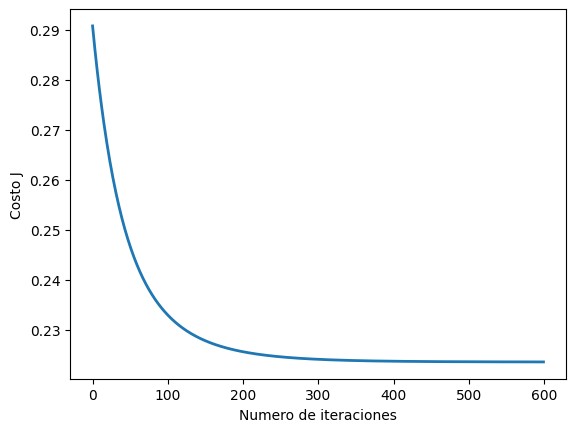

In [41]:
# Elegir algun valor para alpha tasa de aprendizaje (probar varias alternativas)
alpha = 0.0000001
num_iters = 600

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(33)
theta, J_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si encuentra el fraude o no
X_array =[  1, 4,    4,    0,    5,    1,    2,    4,    1,    0,    1,   37,    0,    0,    0,
    5,  103,   14,  500,    2,    3,    2,    1,    4,    5,    1,    0,    0,    1,
    3,    0, 1994,    0]

modo = sigmoid(np.dot(X_array, theta))  

print(f"Segun diferentes caracteristicas existe un fraude al seguro (0) NO (1) SI: :{modo}")

In [68]:
def costFunction(theta, X_train, y_train):
    # Inicializar algunos valores utiles
    m = y_train.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X_train.dot(theta.T))

    J = (1 / m) * np.sum(-y_train.dot(np.log(h)) - (1 - y_train).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y_train).dot(X_train)

    return J, grad

Se prueba la funcion `costFunction` utilizando dos casos de prueba para $\theta$.

In [43]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print('theta inicial')
print(initial_theta)
cost, grad = costFunction(initial_theta, X_train, y_train)
cost, grad = costFunction(initial_theta, X_train, y_train)
print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
#print('Costo esperado (aproximado): 0.7\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad))
#print('Gradiente esperado (aproximado):\n\t[-3.43266072e-01, -4.55317222e+02, -1.40092454e-01, -1.80817496e-01, -8.46303568e+04, -1.92042996e-01, -6.68410206e-02, -6.76148339e-02, 3.56921217e+00, -2.80606891e-02, -4.06766774e+01, -1.71377087e-01,-1.33710416e+01, -1.96386673e+00]\n')



theta inicial
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.555
[3.52918288e-01 1.95820363e+00 9.85311284e-01 1.03274968e+00
 3.58180934e+00 3.17996109e-01 1.48784047e+00 2.33790532e+00
 9.54053178e-01 2.95946822e-01 4.59824903e-01 1.41696174e+01
 1.05869001e-01 4.61219196e-01 1.52237354e-01 4.39785992e-01
 2.74043158e+03 2.99004540e+00 1.43771077e+02 8.77399481e-01
 1.05522049e+00 7.02788586e-01 5.09630350e-01 1.69970817e+00
 1.73777562e+00 1.00518807e-02 2.20492866e-03 6.32295720e-03
 7.05123217e-01 1.02360571e+00 3.45654994e-02 7.04028632e+02
 3.89040208e-01]
Gradiente en theta inicial (zeros):
	[0.3529, 1.9582, 0.9853, 1.0327, 3.5818, 0.3180, 1.4878, 2.3379, 0.9541, 0.2959, 0.4598, 14.1696, 0.1059, 0.4612, 0.1522, 0.4398, 2740.4316, 2.9900, 143.7711, 0.8774, 1.0552, 0.7028, 0.5096, 1.6997, 1.7378, 0.0101, 0.0022, 0.0063, 0.7051, 1.0236, 0.0346, 704.0286, 0.3890]


In [70]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([   1, 4,    4,    0,    5,    1,    2,    4,    1,    0,    1,   37,    0,    0,    0,
    5,  103,   14,  500,    2,    3,    2,    1,    4,    5,    1,    0,    0,    1,
    3,    0, 1994,    0])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X_train, y_train)
print('Costo en theta prueba: {:.0f}'.format(cost))
#print('Costo esperado (aproximado): \n')

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*grad))
#print('Gradiente esperado (aproximado):\n\t[ 1.00000000e+00  1.31843152e+03  4.08812000e-01  5.44838000e-01  2.50184248e+05  5.56943000e-01  2.02093000e-01  1.95997000e-01 -1.04750970e+01  9.02830000e-02  1.18143857e+02  5.09116000e-01  3.98623290e+01  5.75797400e+00]')

[   1    4    4    0    5    1    2    4    1    0    1   37    0    0
    0    5  103   14  500    2    3    2    1    4    5    1    0    0
    1    3    0 1994    0]
Costo en theta prueba: nan
Gradiente en theta prueba:
	[0.941, 5.215, 2.625, 2.744, 9.533, 0.845, 3.970, 6.228, 2.543, 0.792, 1.226, 37.689, 0.267, 1.209, 0.391, 1.199, 7281.880, 7.970, 383.536, 2.343, 2.815, 1.874, 1.365, 4.527, 4.623, 0.026, 0.006, 0.016, 1.882, 2.725, 0.092, 1877.469, 1.005]


C:\Users\micky\AppData\Local\Temp\ipykernel_1760\1087750478.py:10: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y_train.dot(np.log(h)) - (1 - y_train).dot(np.log(1 - h)))


#### 1.2.3 Parámetros de aprendizaje usando `scipy.optimize`

En el codigo anterior se encontró los parámetros óptimos de un modelo de regresión lineal al implementar el descenso de gradiente. Se implemento una función de costo y se calculó su gradiente, utilizando el algoritmo del descenso por el gradiente.

En lugar de realizar los pasos del descenso por el gradiente, se utilizará el [módulo `scipy.optimize`] (https://docs.scipy.org/doc/scipy/reference/optimize.html). SciPy es una biblioteca de computación numérica para `python`. Proporciona un módulo de optimización para la búsqueda y minimización de raíces. A partir de `scipy 1.0`, la función` scipy.optimize.minimize` es el método a utilizar para problemas de optimización (tanto restringidos como no restringidos).

For logistic regression, you want to optimize the cost function $J(\theta)$ with parameters $\theta$.
Concretely, you are going to use `optimize.minimize` to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of X and y values). You will pass to `optimize.minimize` the following inputs:

Para la regresión logística, se desea optimizar la función de costo $J(\theta)$ con los parámetros $\theta$.
Concretamente, se va a utilizar `optimize.minimize` para encontrar los mejores parámetros $\theta$ para la función de costo de regresión logística, dado un dataset fijo (de valores X e y). Se pasara a `optimize.minimize` las siguientes entradas:

- `costFunction`: Una función de costo que, cuando se le da el dataset de entrenamiento y un $\theta$ particular, calcula el costo de regresión logística y el gradiente con respecto a $\theta$ para el dataset(X, y). Es importante tener en cuenta que solo se pasa el nombre de la función sin el paréntesis. Esto indica que solo proporcionamos una referencia a esta función y no evaluamos el resultado de esta función.
- `initial_theta`: Los valores iniciales de los parametros que se tratan de optimizar.
- `(X, y)`: Estos son argumentos adicionales a la funcion de costo.
- `jac`: Indicación si la función de costo devuelve el jacobiano (gradiente) junto con el valor de costo. (True)
- `method`: Método / algoritmo de optimización a utilizar
- `options`: Opciones adicionales que pueden ser específicas del método de optimización específico. Solo se indica al algoritmo el número máximo de iteraciones antes de que termine.

Si se ha completado la `costFunction` correctamente,`optimize.minimize` convergerá en los parámetros de optimización correctos y devolverá los valores finales del costo y $\theta$ en un objeto de clase.

Al usar `optimize.minimize`, no se tuvo que escribir ningún bucle ni establecer una tasa de aprendizaje como se hizo para el descenso de gradientes. Todo esto se hace mediante `optimize.minimize`: solo se necesita proporcionar una función que calcule el costo y el gradiente.

A continuación, se tiene el código para llamar a `optimize.minimize` con los argumentos correctos.

In [45]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X_train, y_train),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
#print('Costo esperado (aproximado): 0.5\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*theta))
#print('Theta esperado (aproximado):\n\t[3.398, -0.000, 0.177, -1.248, -0.000, -0.105, -0.501, 1.325, 0.019, -0.221, -0.004, 0.691, -0.010, -0.058]')

C:\Users\micky\AppData\Local\Temp\ipykernel_1760\137069836.py:7: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,


Costo con un valor de theta encontrado por optimize.minimize: 0.151
theta:
	[-0.136, -0.003, -0.017, -0.030, -0.012, -0.213, 0.000, 0.001, -0.001, 0.267, -0.114, 0.001, -2.637, 0.606, -1.936, 0.043, -0.000, -0.005, 0.001, 0.031, 0.537, -0.359, 0.018, -0.094, -0.103, -0.511, -0.018, -0.671, 0.020, -0.318, -0.123, -0.000, -1.107]


In [46]:
# verificar si ingresa o no a la universidad
X_array = [1,1318.431520,  0.408812,0.544838,250184.248197,0.556943,0.202093,0.195997,-10.475097,0.090283,118.143857,0.509116,39.862329,5.757974]
theta_om = [3.398, -0.000, 0.177, -1.248, -0.000, -0.105, -0.501, 1.325, 0.019, -0.221, -0.004, 0.691, -0.010, -0.058]
modo = sigmoid(np.dot(X_array, theta_om))   # Se debe cambiar esto

print(f"Segun diferentes caracteristicas existe un fraude al seguro (0) NO (1) SI: :{modo}")

Segun diferentes caracteristicas existe un fraude al seguro (0) NO (1) SI: :0.860329439771449


Una vez que se completa `optimize.minimize`, se usa el valor final de $\theta$ para visualizar el límite de decisión en los datos de entrenamiento.



<a id="section4"></a>
#### 1.2.4 Evaluación de la regresión logistica

Después de aprender los parámetros, se puede usar el modelo para predecir si un estudiante en particular será admitido. Para un estudiante con una puntuación en el Examen 1 de 45 y una puntuación en el Examen 2 de 85, debe esperar ver una probabilidad de admisión de 0,776. Otra forma de evaluar la calidad de los parámetros que hemos encontrado es ver qué tan bien predice el modelo aprendido en nuestro conjunto de entrenamiento.

In [47]:
def predict(theta, X_train):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Datos utilizados para el calculo de las predicciones.
        La fila es el numero de los puntos para calcular las predicciones,
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X_train.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X_train.dot(theta.T)))
    return p

Una vez entrenado el modelo se procede a realizar la prediccion y evaluación de los resultados de predecir cual es el valor que vota el modelo para todos los datos utilizados en el entrenamiento.

In [75]:
#  Predice la probabilidad de fraude en seguros de automoviles:
prob = sigmoid(np.dot([   1 , 4,    4,    0,    5,    1,    2,    4,    1,    0,    1,   37,    0,    0,    0,
    5,  103,   14,  500,    2,    3,    2,    1,    4,    5,    1,    0,    0,    1,
    3,    0, 1994,    0], theta))
print('Segun diferentes caracteristicas existe un fraude al seguro (0) NO (1) SI:  {:.3f}%'.format(prob))
#print('Valor esperado: 0.85 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X_train)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_train) * 100))
#print('Precisión esperada (aproximadamente): 89.00 %')

Segun diferentes caracteristicas existe un fraude al seguro (0) NO (1) SI:  0.122%
Precisión de entrenamiento: 94.11 %
